In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.sample(5)

,Category,Message
479,ham,"K, can I pick up another 8th when you're done?"
4443,ham,Dear i am not denying your words please
2083,ham,I'm done oredi...
4900,ham,"Haha, that was the first person I was gonna ask"
2305,ham,Friendship poem: Dear O Dear U R Not Near But ...


In [4]:
df.shape

(5572, 2)

# **1. Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull().sum()

,0
Category,0
Message,0


In [7]:
# renaming the cols
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
53,ham,Wow. I never realized that you were so embaras...
1065,ham,"That's fine, I'll bitch at you about it later ..."
3693,ham,No i am not having not any movies in my laptop
1007,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...
4212,ham,Oi when you gonna ring


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check for duplicate values
df.duplicated().sum()

np.int64(415)

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.shape

(5157, 2)

# **2. EDA**

In [14]:
df['target'].value_counts()
# Data is imbalanced

,count
target,
0,4516
1,641


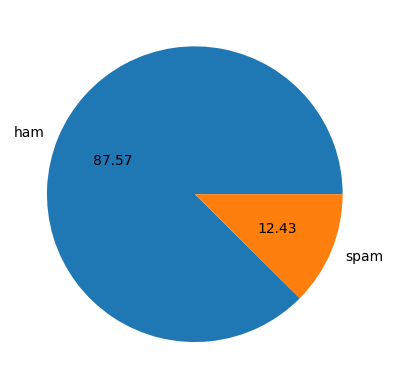

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df['num_characters'] = df['text'].apply(len)

In [18]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

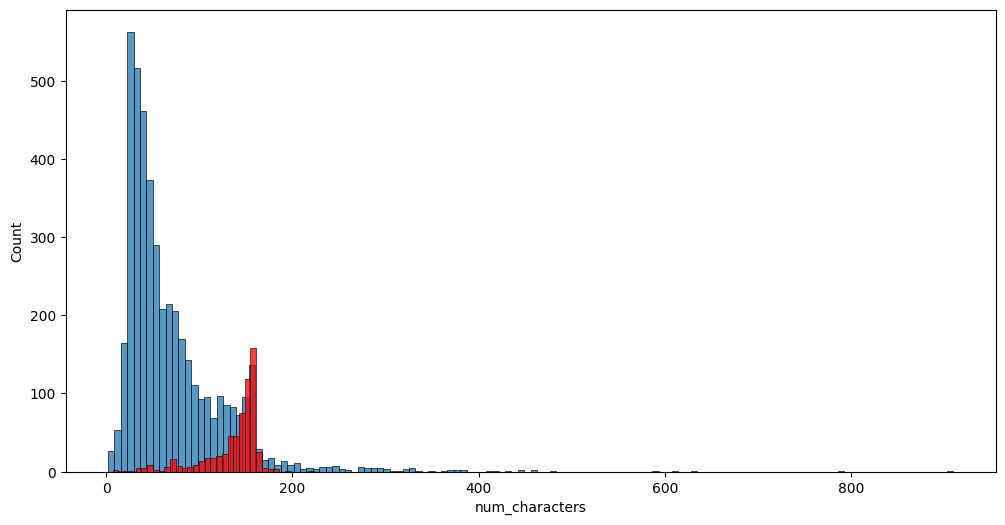

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
# spam have more characters

<Axes: xlabel='num_words', ylabel='Count'>

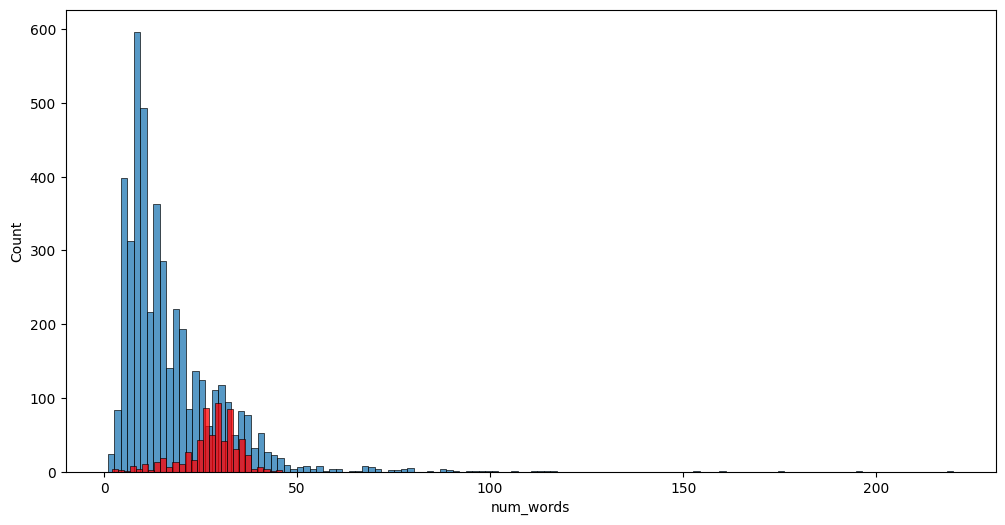

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
# spam have more words

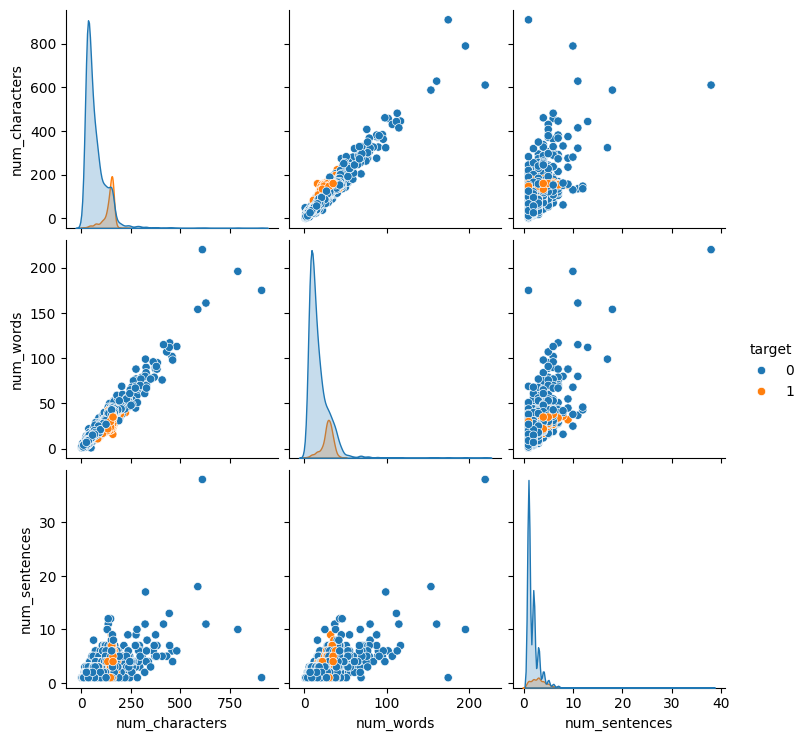

In [28]:
sns.pairplot(df,hue='target')

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5157 non-null   int64 
 1   text            5157 non-null   object
 2   num_characters  5157 non-null   int64 
 3   num_words       5157 non-null   int64 
 4   num_sentences   5157 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 241.7+ KB


<Axes: >

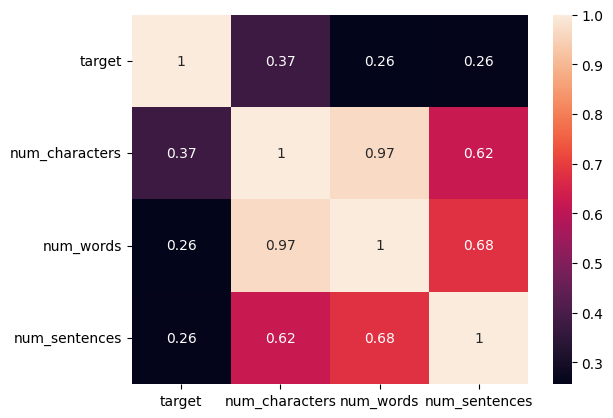

In [30]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

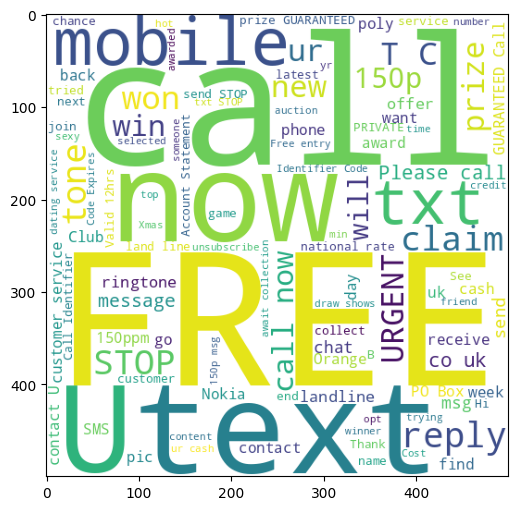

In [32]:
spam_wc = wc.generate(df[df['target'] == 1]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

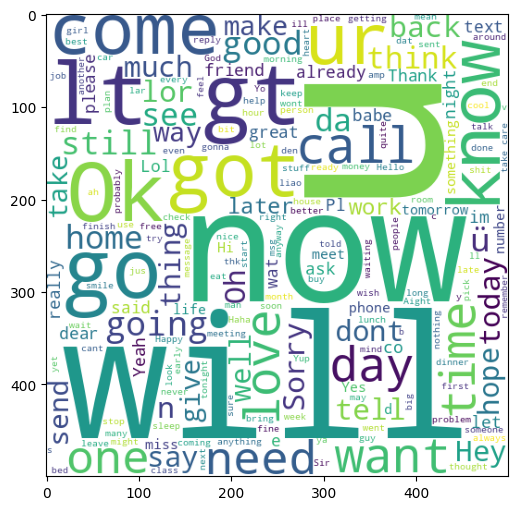

In [33]:
ham_wc = wc.generate(df[df['target'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [34]:
spam_corpus = []
for msg in df[df['target'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [35]:
len(spam_corpus)

15166

/tmp/ipython-input-300513836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette=sns.color_palette("husl", 8))
/tmp/ipython-input-300513836.py:2: UserWarning: 
The palette list has fewer values (8) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette=sns.color_palette("husl", 8))


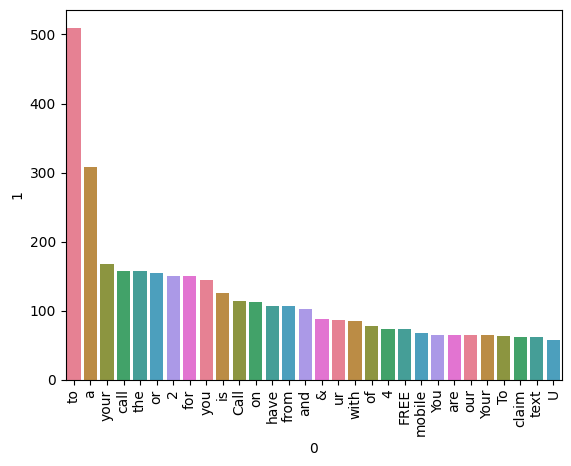

In [36]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette=sns.color_palette("husl", 8))
plt.xticks(rotation='vertical')
plt.show()

In [37]:
ham_corpus = []
for msg in df[df['target'] == 0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [38]:
len(ham_corpus)

64307

/tmp/ipython-input-3052684460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='viridis')


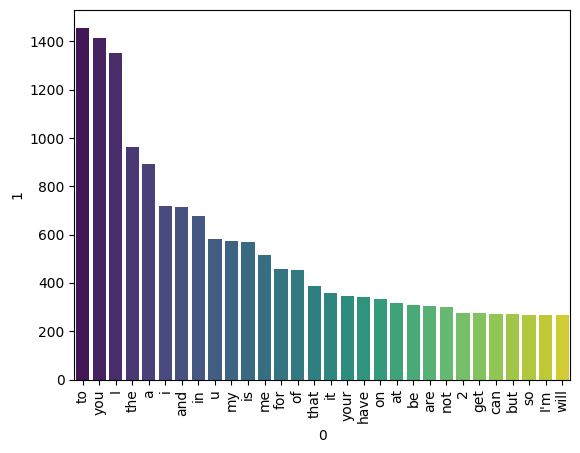

In [39]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

# **3. Data Preprocessing**
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [40]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [42]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **4. Modelling**

In [45]:
# Text Vectorization using Bag of Words(BOW)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
X.shape

(5157, 3000)

In [48]:
y= df['target'].values

In [49]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8682170542635659
[[786 119]
 [ 17 110]]
0.48034934497816595


In [53]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9718992248062015
[[905   0]
 [ 29  98]]
1.0


In [54]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


Choosing MNB as it has max precision

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [59]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777131782945736, 0.9905660377358491)

In [60]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9718992248062015
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8144329896907216
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9709302325581395
Precision -  0.98989898989899
For  AdaBoost
Accuracy -  0.9282945736434108
Precision -  0.8441558441558441
For  BgC
Accuracy -  0.9641472868217055
Precision -  0.8947368421052632
For  ETC
Accuracy -  0.9718992248062015
Precision -  0.99
For  GBDT
Accuracy -  0.9525193798449613
Precision -  0.975609756097561
For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9805825242718447


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [62]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.971899,1.000000
0,SVC,0.977713,0.990566
8,ETC,0.971899,0.990000
5,RF,0.970930,0.989899
10,xgb,0.972868,0.980583
9,GBDT,0.952519,0.975610
4,LR,0.958333,0.937500
7,BgC,0.964147,0.894737
6,AdaBoost,0.928295,0.844156


In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [64]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.971899
2,SVC,Accuracy,0.977713
3,ETC,Accuracy,0.971899
4,RF,Accuracy,0.970930
5,xgb,Accuracy,0.972868
6,GBDT,Accuracy,0.952519
7,LR,Accuracy,0.958333
8,BgC,Accuracy,0.964147
9,AdaBoost,Accuracy,0.928295


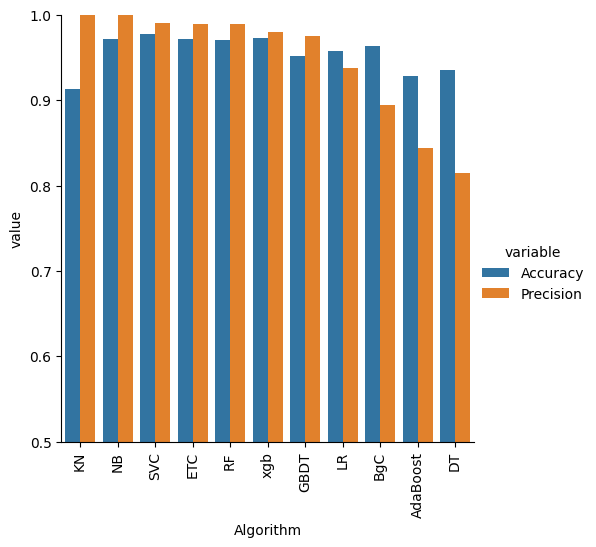

In [65]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [67]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [68]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [69]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806201550387597
Precision 1.0


In [70]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [71]:
from sklearn.ensemble import StackingClassifier

In [72]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [73]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9844961240310077
Precision 0.9911504424778761


In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))